1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1.016543126
1.094763133
1.033040115
1.060243844
1.034139717
1.023732013
1.043533493
1.095298366
1.096680844
1.041297922
1.000782359
1.003428081
1.062439549
1.04465276
1.046469666
1.133302197
1.362124658
1.057770414
1.159147747
1.121087038
1.294165834
1.319184999
1.392042811
1.370564967
1.328475991
1.11130662
1.000849953
1.312139042
1.121908297
1.220290755
1.172297554
1.347774335
1.115796505
1.162994685
1.102806563
1.328733274
1.332107673
1.354171488
1.311094336
1.333065953
1.199347312
1.007662151
1.28302802
1.121553102
1.226602354
1.361209652
1.464484041
1.089685778
1.27853834
1.233880283
1.612680826
1.619318667
1.673504762
1.595622405
1.639366909
1.401174438
1.013618789
1.542333722
1.269679789
1.410047258
1.348877576
1.561669751
1.185900793
1.265392448
1.168811422
1.534565251
1.559879302
1.619578166
1.599545546
1.547682589
1.306266715
1.015262571
1.589612765
1.203983006
1.393359136
1.133015946
1.307460075
1.072452675
1.123604421
1.064118577
1.304723117
1.

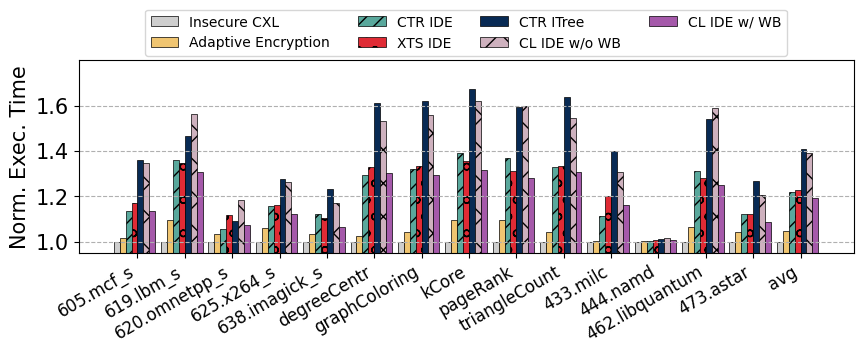

In [12]:
import numpy as np    
import matplotlib.pyplot as plt    
import openpyxl
import itertools
#bar patterns
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

N=15
x=np.arange(N) 
xclicks=[
    '605.mcf_s','619.lbm_s','620.omnetpp_s','625.x264_s','638.imagick_s',
    'degreeCentr','graphColoring','kCore','pageRank','triangleCount',
    '433.milc','444.namd','462.libquantum','473.astar','avg'
]
xlabels=''
ylabels='Norm. Exec. Time'
wb = openpyxl.load_workbook(filename="bench.xlsx")
ws = wb['Sheet1']

b1=np.array([])

for col in ws.iter_cols(min_row=2,min_col=2,values_only=True):
    for value in col:
        if value is None:
            value = 1
        # 获取单元格数据
        b1=np.append(b1,value)     
        print(value)            
b1=b1.reshape(7, 15)
print(b1)


allfigsize=(10,2.5)     
width=0.125
plt.figure(figsize=allfigsize)
i = (lambda c: lambda: next(c))(itertools.count(0))
j = (lambda c: lambda: next(c))((itertools.count(0)))

print(b1[0])
# plt.bar(x - width*2.5, b1[0], width, label='Insecure Local', color='#cecece', hatch=".", edgecolor='black', linewidth=0.5, align='center')
# plt.bar(x - width*1.5, b1[2], width, label='XTS TEE Local', color='#a559aa', hatch="-", edgecolor='black', linewidth=0.5, align='center') 
off = 7 / 2
plt.bar(x + width*(j() - off), b1[i()], width, label='Insecure CXL ', color='#cecece',edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='Adaptive Encryption',color='#f0c571', edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='CTR IDE', color='#59a89c',  hatch="//" , edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='XTS IDE', color='#e02b35', hatch="o",edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='CTR ITree ', color='#082a54', edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='CL IDE w/o WB',  color='#CEB1BE', hatch="x", edgecolor='black', linewidth=0.5, align='center' )
plt.bar(x + width*(j() - off), b1[i()], width, label='CL IDE w/ WB', color='#a559aa', edgecolor='black', linewidth=0.5, align='center')
# plt.bar(x + width*(j() - off), b1[i()], width, label='Counter Light (w/ ECC)', color='#CEB1BE', edgecolor='black', linewidth=0.5, align='center')

#5F634F

plt.grid(axis='y',linestyle='--')
plt.xticks(x,xclicks, fontsize=12, rotation=30,ha='right', va='top') 
#plt.ylim(0,180000)
plt.ylim(0.95,  1.8)
plt.yticks([1.0,1.2,1.4,1.6],fontsize=15)
#plt.xlabel(xlabels,fontsize=15)
plt.ylabel(ylabels,fontsize=15)    
plt.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.50, 1.30), fontsize=10)    
plt.savefig('bench-1core.pdf',bbox_inches = 'tight')    
plt.show()

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1.096199236
1.060374593
1.029541179
1.045270705
1.041152461
1.003395516
1.001869185
1.056951608
1.094847677
1.012511794
1.000672967
1.00778024
1.143231284
1.047682845
1.045820092
1.178071623
1.236083122
1.077249121
1.14473178
1.243701771
1.135951791
1.175606075
1.262902621
1.312985696
1.20994812
1.087619118
1.018490677
1.357314283
1.213457809
1.189579543
1.143731787
1.2024832
1.086384155
1.110521377
1.098155062
1.194655928
1.202103556
1.219217132
1.20768935
1.200792969
1.167035589
1.011498531
1.252342249
1.091743875
1.156311054
1.536088672
1.438637213
1.295509563
1.362461169
1.491947528
1.455628314
1.45566643
1.491475429
1.516453077
1.516463347
1.537995893
1.06669433
1.594507673
1.581278805
1.452914817
1.204210522
1.361288993
1.27971136
1.372205139
1.288529852
1.535285128
1.599681202
1.383017933
1.675480365
1.544131523
1.408888019
1.038462792
1.507520853
1.338742581
1.395511162
1.159601034
1.222321517
1.088404483
1.11612701
1.113620724
1.212415172
1.205031

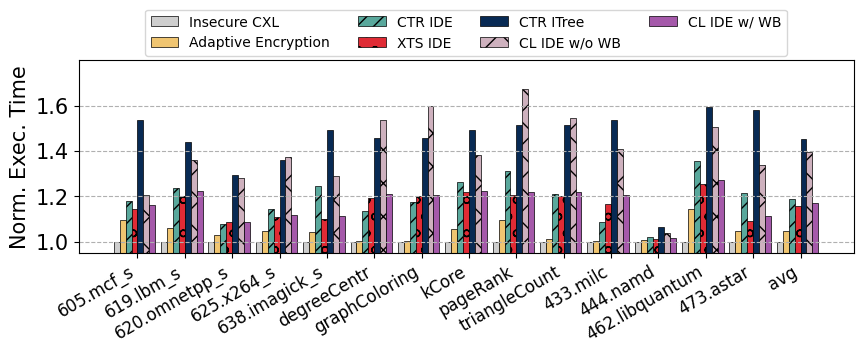

In [17]:
import numpy as np    
import matplotlib.pyplot as plt    
import openpyxl
import itertools
#bar patterns
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

N=15
x=np.arange(N) 
xclicks=[
    '605.mcf_s','619.lbm_s','620.omnetpp_s','625.x264_s','638.imagick_s',
    'degreeCentr','graphColoring','kCore','pageRank','triangleCount',
    '433.milc','444.namd','462.libquantum','473.astar','avg'
]
xlabels=''
ylabels='Norm. Exec. Time'
wb = openpyxl.load_workbook(filename="bench-8core.xlsx")
ws = wb['Sheet1']

b1=np.array([])

for col in ws.iter_cols(min_row=2,min_col=2,values_only=True):
    for value in col:
        if value is None:
            value = 1
        # 获取单元格数据
        b1=np.append(b1,value)     
        print(value)            
b1=b1.reshape(7, 15)
print(b1)


allfigsize=(10,2.5)     
width=0.125
plt.figure(figsize=allfigsize)
i = (lambda c: lambda: next(c))(itertools.count(0))
j = (lambda c: lambda: next(c))((itertools.count(0)))

print(b1[0])
# plt.bar(x - width*2.5, b1[0], width, label='Insecure Local', color='#cecece', hatch=".", edgecolor='black', linewidth=0.5, align='center')
# plt.bar(x - width*1.5, b1[2], width, label='XTS TEE Local', color='#a559aa', hatch="-", edgecolor='black', linewidth=0.5, align='center') 
off = 7 / 2
plt.bar(x + width*(j() - off), b1[i()], width, label='Insecure CXL ', color='#cecece',edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='Adaptive Encryption',color='#f0c571', edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='CTR IDE', color='#59a89c',  hatch="//" , edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='XTS IDE', color='#e02b35', hatch="o",edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='CTR ITree ', color='#082a54', edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='CL IDE w/o WB',  color='#CEB1BE', hatch="x", edgecolor='black', linewidth=0.5, align='center' )
plt.bar(x + width*(j() - off), b1[i()], width, label='CL IDE w/ WB', color='#a559aa', edgecolor='black', linewidth=0.5, align='center')

# plt.bar(x + width*(j() - off), b1[i()], width, label='Counter Light (w/ ECC)', color='#CEB1BE', edgecolor='black', linewidth=0.5, align='center')

#5F634F

plt.grid(axis='y',linestyle='--')
plt.xticks(x,xclicks, fontsize=12, rotation=30,ha='right', va='top') 
#plt.ylim(0,180000)
plt.ylim(0.95,  1.8)
plt.yticks([1.0,1.2,1.4,1.6],fontsize=15)
#plt.xlabel(xlabels,fontsize=15)
plt.ylabel(ylabels,fontsize=15)    
plt.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.50, 1.30), fontsize=10)    
plt.savefig('bench-8core.pdf',bbox_inches = 'tight')    
plt.show()